# Earthquakes

## Installations

In [1]:
# !pip3 install --upgrade pip

In [2]:
# %pip install geopandas
# %pip install tabulate
# pip install contextily

## Imports

In [1]:
import sys

from tabulate import tabulate
import numpy as np
import pandas as pd

import geopandas

from shapely.geometry import box, Point

import folium

import matplotlib.pyplot as plt
%matplotlib inline

import contextily as cx

import mapclassify

## Display Imports & Their Versions

In [2]:
headers = ["Software/Library", "Version"]

table_data = [
    ['Python', sys.version[0:6]],
    ['NumPy', np.__version__],
    ['Pandas', pd.__version__],
    ['geopandas', geopandas.__version__],
    ['Folium', folium.__version__],
    ['Contextily', cx.__version__],
    ['Map Classify', mapclassify.__version__]
    ]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+--------------------+-----------+
| Software/Library   | Version   |
+====================+===========+
| Python             | 3.11.4    |
+--------------------+-----------+
| NumPy              | 1.26.4    |
+--------------------+-----------+
| Pandas             | 1.5.3     |
+--------------------+-----------+
| geopandas          | 1.0.1     |
+--------------------+-----------+
| Folium             | 0.19.4    |
+--------------------+-----------+
| Contextily         | 1.6.2     |
+--------------------+-----------+
| Map Classify       | 2.8.1     |
+--------------------+-----------+


## Import Dataset

In [3]:
gdf = geopandas.read_file("data/significant-earthquake-database.geojson")

gdf

i_d flag_tsunami  year month   day  focal_depth  eq_primary  eq_mag_mw  \
0       78         None   334  None  None          NaN         NaN        NaN   
1       84      Tsunami   344  None  None          NaN         NaN        NaN   
2     9989      Tsunami   346  None  None          NaN         6.8        NaN   
3      110         None   438  None  None          NaN         NaN        NaN   
4     9971      Tsunami   557  None  None          NaN         7.0        NaN   
...    ...          ...   ...   ...   ...          ...         ...        ...   
6203  6403      Tsunami  1962    03    12         35.0         6.8        NaN   
6204  4320         None  1964    06    14          NaN         6.1        NaN   
6205  8079         None  1966    02    05          NaN         6.5        NaN   
6206  4382         None  1966    10    29         20.0         5.7        NaN   
6207  6596      Tsunami  1967    03    19         38.0         7.0        NaN   

      eq_mag_ms  eq_mag_mb  ...  total_injuries total_injuries_description  \
0           NaN        NaN  ...             NaN                       None   
1           NaN        NaN  ...             NaN                       None   
2           6.8        NaN  ...             NaN                       None   
3           NaN        NaN  ...             NaN                       None   
4           7.0        NaN  ...             NaN                       None   
...         ...        ...  ...             ...                        ...   
6203        6.8        NaN  ...             NaN                       None   
6204        NaN        NaN  ...             NaN                       None   
6205        6.5        NaN  ...             NaN                       None   
6206        5.7        NaN  ...            23.0      Few (~1 to 50 deaths)   
6207        7.0        NaN  ...             NaN                       None   

      total_damage_millions_dollars  \
0                              None   
1                              None   
2                              None   
3                              None   
4                              None   
...                             ...   
6203                           None   
6204                           None   
6205                           None   
6206                           None   
6207                           None   

                               total_damage_description  \
0                                                  None   
1                          SEVERE (~>$5 to $24 million)   
2                          MODERATE (~$1 to $5 million)   
3                                                  None   
4                                                  None   
...                                                 ...   
6203  LIMITED (roughly corresponding to less than $1...   
6204                                               None   
6205                       MODERATE (~$1 to $5 million)   
6206                       SEVERE (~>$5 to $24 million)   
6207                                               None   

     total_houses_destroyed total_houses_destroyed_description  \
0                       NaN                               None   
1                       NaN                               None   
2                       NaN         Many (~101 to 1000 houses)   
3                       NaN                               None   
4                       NaN                               None   
...                     ...                                ...   
6203                    NaN                               None   
6204                    NaN                               None   
6205                    NaN         Many (~101 to 1000 houses)   
6206                    NaN         Many (~101 to 1000 houses)   
6207                    NaN                               None   

     total_houses_damaged  total_houses_damaged_description  coordinates  \
0                     NaN                         

In [4]:
gdf.describe(include='all')

i_d flag_tsunami         year month   day  focal_depth   eq_primary  \
count   6208         1838  6208.000000  5800  5646  3243.000000  4416.000000   
unique  6208            1          NaN    12    31          NaN          NaN   
top       78      Tsunami          NaN    11    25          NaN          NaN   
freq       1         1838          NaN   515   230          NaN          NaN   
mean     NaN          NaN  1805.837790   NaN   NaN    41.064755     6.458084   
std      NaN          NaN   375.890879   NaN   NaN    70.317966     1.045100   
min      NaN          NaN -2150.000000   NaN   NaN     0.000000     1.600000   
25%      NaN          NaN  1820.000000   NaN   NaN    10.000000     5.700000   
50%      NaN          NaN  1928.000000   NaN   NaN    25.000000     6.500000   
75%      NaN          NaN  1989.000000   NaN   NaN    40.000000     7.300000   
max      NaN          NaN  2020.000000   NaN   NaN   675.000000     9.500000   

          eq_mag_mw    eq_mag_ms    eq_mag_mb  ...  total_injuries  \
count   1334.000000  2930.000000  1804.000000  ...     1259.000000   
unique          NaN          NaN          NaN  ...             NaN   
top             NaN          NaN          NaN  ...             NaN   
freq            NaN          NaN          NaN  ...             NaN   
mean       6.513193     6.574198     5.792572  ...     2379.995234   
std        0.928359     0.990792     0.724433  ...    27424.400752   
min        3.600000     2.100000     2.100000  ...        1.000000   
25%        5.800000     5.800000     5.300000  ...       10.000000   
50%        6.500000     6.600000     5.800000  ...       40.000000   
75%        7.200000     7.300000     6.300000  ...      200.000000   
max        9.500000     9.100000     8.200000  ...   799000.000000   

       total_injuries_description  total_damage_millions_dollars  \
count                        1441                            456   
unique                          4                            247   
top         Few (~1 to 50 deaths)                          5.000   
freq                          729                             39   
mean                          NaN                            NaN   
std                           NaN                            NaN   
min                           NaN                            NaN   
25%                           NaN                            NaN   
50%                           NaN                            NaN   
75%                           NaN                            NaN   
max                           NaN                            NaN   

                                 total_damage_description  \
count                                                3293   
unique                                                  4   
top     LIMITED (roughly corresponding to less than $1...   
freq                                                 1041   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

       total_houses_destroyed total_houses_destroyed_description  \
count            8.170000e+02                               1784   
unique                    NaN                                  4   
top                       NaN         Many (~101 to 1000 houses)   
freq                      NaN                                703   
mean             1.819171e+04                                NaN   
std              1.950541e+05                                NaN   
min              1.000000e+00                                NaN   
25%              6.100000e+01                                NaN   
50%              5.000000e+02                

### Retrieve Some Additional Information About Dataset

In [5]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6208 entries, 0 to 6207
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   i_d                                 6208 non-null   object  
 1   flag_tsunami                        1838 non-null   object  
 2   year                                6208 non-null   int32   
 3   month                               5800 non-null   object  
 4   day                                 5646 non-null   object  
 5   focal_depth                         3243 non-null   float64 
 6   eq_primary                          4416 non-null   float64 
 7   eq_mag_mw                           1334 non-null   float64 
 8   eq_mag_ms                           2930 non-null   float64 
 9   eq_mag_mb                           1804 non-null   float64 
 10  eq_mag_ml                           184 non-null    float64 
 11  eq_mag_mfa            

### Start Cleaning Dataset

In [6]:
gdf['flag_tsunami'] = gdf['flag_tsunami'].replace('None', 'No Tsunami')
gdf['flag_tsunami'] = gdf['flag_tsunami'].fillna('No Tsunami')
gdf['flag_tsunami'] = gdf['flag_tsunami'].astype(str)


gdf['state'] = gdf['state'].fillna('Not Listed')

gdf['country'] = gdf['country'].str.strip().str.title()

gdf = gdf.dropna(subset=['location_name'])
gdf = gdf[gdf['location_name'].str.strip() != '']

gdf['deaths'] = gdf['deaths'].fillna(-1)
gdf['houses_damaged'] = gdf['houses_damaged'].fillna('Not Listed')

gdf['total_damage_millions_dollars'] = gdf['total_damage_millions_dollars'].fillna('-1')
gdf['total_damage_millions_dollars'] = gdf['total_damage_millions_dollars'].astype(float)

### Convert Day, Month, & Year to Date Feature

In [7]:
gdf['month'] = gdf['month'].fillna(1)
gdf['day'] = gdf['day'].fillna(1)

# Create a 'date' column by combining 'year', 'month', and 'day'
gdf['date'] = pd.to_datetime(gdf[['year', 'month', 'day']], errors='coerce')

gdf.drop(columns=['year', 'month', 'day'], inplace=True)

### Return Information About Unqiue Values in Select Features

In [8]:
cols_to_check = [
    'i_d',
    'flag_tsunami',
    'focal_depth',
    'eq_primary',
    'eq_mag_mw',
    'eq_mag_ms',
    'eq_mag_mb',
    'eq_mag_ml',
    'eq_mag_unk',
    'intensity',
    'country',
    'state',
    'location_name',
    'region_code',
    'deaths',
    'missing',
    'injuries',
    'damage_millions_dollars',
    'houses_destroyed',
    'houses_damaged',
    'total_deaths',
    'total_missing',
    'total_injuries',
    'total_damage_millions_dollars',
    'total_houses_destroyed',
    'total_houses_damaged',
    'coordinates'
]

cutoff = int(len(gdf) / 20)

for col in cols_to_check:
    u_vals = np.sort(gdf[col].unique())
    if len(u_vals) < cutoff:
        print(f"{col} ({len(u_vals)})\n{u_vals}\n")
    else:
        print(f"{col} ({len(u_vals)})\n")

i_d (6207)

flag_tsunami (2)
['No Tsunami' 'Tsunami']

focal_depth (199)
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  78.  79.  80.  81.  82.  83.  84.  85.
  86.  87.  88.  89.  90.  91.  93.  94.  95.  96.  98.  99. 100. 101.
 102. 104. 105. 106. 107. 108. 109. 110. 112. 113. 114. 115. 116. 120.
 123. 126. 127. 128. 129. 130. 131. 132. 135. 136. 140. 141. 142. 145.
 149. 150. 152. 153. 154. 156. 157. 158. 160. 161. 167. 170. 176. 179.
 180. 184. 187. 189. 190. 191. 196. 200. 204. 206. 207. 208. 212. 215.
 217. 219. 220. 223. 225. 226. 230. 231. 236. 240. 250. 257. 260. 289.
 325. 340. 350. 397. 400. 430. 460. 500. 516. 543. 549. 550. 563. 580.
 583

### Remove Select Features 

In [9]:
cols_to_remove = [
    'i_d',
    'eq_mag_mfa',
    'deaths_description',
    'missing_description',
    'injuries_description',
    'damage_description',
    'houses_destroyed_description',
    'houses_damaged_description', 
    'total_deaths_description',
    'total_missing_description',
    'total_injuries_description',
    'total_houses_destroyed_description',
    'total_houses_damaged_description',
    'total_damage_description',
    'coordinates'
    ]

gdf.drop(columns=cols_to_remove, inplace=True)

gdf

flag_tsunami  focal_depth  eq_primary  eq_mag_mw  eq_mag_ms  eq_mag_mb  \
0      No Tsunami          NaN         NaN        NaN        NaN        NaN   
1         Tsunami          NaN         NaN        NaN        NaN        NaN   
2         Tsunami          NaN         6.8        NaN        6.8        NaN   
3      No Tsunami          NaN         NaN        NaN        NaN        NaN   
4         Tsunami          NaN         7.0        NaN        7.0        NaN   
...           ...          ...         ...        ...        ...        ...   
6203      Tsunami         35.0         6.8        NaN        6.8        NaN   
6204   No Tsunami          NaN         6.1        NaN        NaN        NaN   
6205   No Tsunami          NaN         6.5        NaN        6.5        NaN   
6206   No Tsunami         20.0         5.7        NaN        5.7        NaN   
6207      Tsunami         38.0         7.0        NaN        7.0        NaN   

      eq_mag_ml  eq_mag_unk  intensity  country  ... houses_destroyed  \
0           NaN         NaN       10.0  Albania  ...              NaN   
1           NaN         NaN        9.0   Turkey  ...              NaN   
2           NaN         NaN        9.0  Albania  ...              NaN   
3           NaN         NaN       10.0   Greece  ...              NaN   
4           NaN         NaN        9.0   Turkey  ...              NaN   
...         ...         ...        ...      ...  ...              ...   
6203        NaN         NaN        NaN   Panama  ...              NaN   
6204        NaN         6.1        8.0   Turkey  ...              NaN   
6205        NaN         NaN        9.0    China  ...              NaN   
6206        NaN         NaN        NaN   Greece  ...              NaN   
6207        NaN         NaN        8.0   Russia  ...              NaN   

     houses_damaged  total_deaths  total_missing  total_injuries  \
0        Not Listed           NaN            NaN             NaN   
1        Not Listed           NaN            NaN             NaN   
2        Not Listed           NaN            NaN             NaN   
3        Not Listed           NaN            NaN             NaN   
4        Not Listed           NaN            NaN             NaN   
...             ...           ...            ...             ...   
6203     Not Listed           NaN            NaN             NaN   
6204     Not Listed           NaN            NaN             NaN   
6205     Not Listed           NaN            NaN             NaN   
6206     Not Listed           1.0            NaN            23.0   
6207     Not Listed           NaN            NaN             NaN   

      total_damage_millions_dollars  total_houses_destroyed  \
0                              -1.0                     NaN   
1                              -1.0                     NaN   
2                              -1.0                     NaN   
3                              -1.0                     NaN   
4                              -1.0                     NaN   
...                             ...                     ...   
6203                           -1.0                     NaN   
6204                           -1.0                     NaN   
6205                           -1.0                     NaN   
6206                           -1.0                     NaN   
6207                           -1.0                     NaN   

      total_houses_damaged               geometry       date  
0                      NaN      POINT (19.3 41.2)        NaT  
1                      NaN      POINT (26.5 40.3)        NaT  
2                      NaN      POINT (19.4 41.4)        NaT  
3                      NaN      POINT (25.5 35.5)        NaT  
4                      NaN      POINT (27.6 40.9)        NaT  
...                    ...                    ...        ...  
6203                   NaN  POINT (-82.757 8.008) 1962-03-12  
6204                   NaN      POINT (38.3 38.1) 1964-06-14  
6205                   NaN     POINT (

In [10]:
gdf.describe(include='all')

/var/folders/93/v_c2ph_17t97zdkzc4_ccjtw0000gn/T/ipykernel_78027/275143427.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  gdf.describe(include='all')


flag_tsunami  focal_depth   eq_primary    eq_mag_mw    eq_mag_ms  \
count          6207   3242.00000  4415.000000  1333.000000  2930.000000   
unique            2          NaN          NaN          NaN          NaN   
top      No Tsunami          NaN          NaN          NaN          NaN   
freq           4370          NaN          NaN          NaN          NaN   
first           NaN          NaN          NaN          NaN          NaN   
last            NaN          NaN          NaN          NaN          NaN   
mean            NaN     41.07372     6.457826     6.512378     6.574198   
std             NaN     70.32696     1.045077     0.928230     0.990792   
min             NaN      0.00000     1.600000     3.600000     2.100000   
25%             NaN     10.00000     5.700000     5.800000     5.800000   
50%             NaN     25.00000     6.500000     6.500000     6.600000   
75%             NaN     40.00000     7.300000     7.200000     7.300000   
max             NaN    675.00000     9.500000     9.500000     9.100000   

          eq_mag_mb   eq_mag_ml  eq_mag_unk    intensity country  ...  \
count   1804.000000  184.000000  777.000000  2826.000000    6207  ...   
unique          NaN         NaN         NaN          NaN     155  ...   
top             NaN         NaN         NaN          NaN   China  ...   
freq            NaN         NaN         NaN          NaN     606  ...   
first           NaN         NaN         NaN          NaN     NaN  ...   
last            NaN         NaN         NaN          NaN     NaN  ...   
mean       5.792572    5.395109    6.652638     8.283439     NaN  ...   
std        0.724433    1.087850    1.007854     1.825092     NaN  ...   
min        2.100000    1.600000    3.200000     2.000000     NaN  ...   
25%        5.300000    4.775000    6.000000     7.000000     NaN  ...   
50%        5.800000    5.450000    6.800000     8.000000     NaN  ...   
75%        6.300000    6.025000    7.500000    10.000000     NaN  ...   
max        8.200000    7.700000    8.800000    12.000000     NaN  ...   

       houses_destroyed houses_damaged   total_deaths  total_missing  \
count      7.860000e+02           6207    1702.000000       25.00000   
unique              NaN            313            NaN            NaN   
top                 NaN     Not Listed            NaN            NaN   
freq                NaN           5717            NaN            NaN   
first               NaN            NaN            NaN            NaN   
last                NaN            NaN            NaN            NaN   
mean       1.762395e+04            NaN    4228.737368     1910.68000   
std        1.971549e+05            NaN   28267.559410     8667.79685   
min        1.000000e+00            NaN       1.000000        1.00000   
25%        6.425000e+01            NaN       3.000000        5.00000   
50%        5.060000e+02            NaN      20.000000       21.00000   
75%        4.000000e+03            NaN     289.500000      138.00000   
max        5.360000e+06            NaN  830000.000000    43476.00000   

        total_injuries  total_damage_millions_dollars  total_houses_destroyed  \
count      1259.000000                    6207.000000            8.170000e+02   
unique             NaN                            NaN                     NaN   
top                NaN                            NaN                     NaN   
freq               NaN                            NaN                     NaN   
first              NaN                            NaN                     NaN   
last               NaN                            NaN                     NaN   
mean       2379.995234                     138.091428            1.819171e+04   
std       27424.400752                    3412.329631            1.950541e+05   
min           1.000000                      -1.000000            1.000000e+00   
25%          10.000000                      -1.000000            6.100000e+01   
50%          40.000000           

In [11]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 6207 entries, 0 to 6207
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   flag_tsunami                   6207 non-null   object        
 1   focal_depth                    3242 non-null   float64       
 2   eq_primary                     4415 non-null   float64       
 3   eq_mag_mw                      1333 non-null   float64       
 4   eq_mag_ms                      2930 non-null   float64       
 5   eq_mag_mb                      1804 non-null   float64       
 6   eq_mag_ml                      184 non-null    float64       
 7   eq_mag_unk                     777 non-null    float64       
 8   intensity                      2826 non-null   float64       
 9   country                        6207 non-null   object        
 10  state                          6207 non-null   object        
 11  location_

### Rename Features as Needed

In [12]:
cols_to_rename = {
    'flag_tsunami': 'Tsunami Flag',
    'focal_depth': 'Focal Depth',
    'eq_primary': 'Primary Magnitude',
    'eq_mag_mw': 'MW Magnitude',
    'eq_mag_ms': 'MS Magnitude',
    'eq_mag_mb': 'MB Magnitude',
    'eq_mag_ml': 'ML Magnitude',
    'eq_mag_unk': 'UK Magnitude',
    'intensity': 'Intensity',
    'country': 'Country',
    'state': 'State',
    'location_name': 'Location Name',
    'region_code': 'Region Code',
    'deaths': 'Deaths',
    'missing': 'Missing',
    'injuries': 'Injuries',
    'damage_millions_dollars': 'Damage (in Millions of $)',
    'houses_destroyed': 'Houses Destroyed',
    'houses_damaged': 'Houses Damaged',
    'total_deaths': 'Total Deaths',
    'total_missing': 'Total Missing',
    'total_injuries': 'Total Injuries',
    'total_damage_millions_dollars': 'Total Damage (in Millions of $)',
    'total_houses_destroyed': 'Total Houses Destroyed',
    'total_houses_damaged': 'Total Houses Damaged'
}

gdf.rename(columns=cols_to_rename, inplace=True)

gdf.head()

Tsunami Flag  Focal Depth  Primary Magnitude  MW Magnitude  MS Magnitude  \
0   No Tsunami          NaN                NaN           NaN           NaN   
1      Tsunami          NaN                NaN           NaN           NaN   
2      Tsunami          NaN                6.8           NaN           6.8   
3   No Tsunami          NaN                NaN           NaN           NaN   
4      Tsunami          NaN                7.0           NaN           7.0   

   MB Magnitude  ML Magnitude  UK Magnitude  Intensity  Country  ...  \
0           NaN           NaN           NaN       10.0  Albania  ...   
1           NaN           NaN           NaN        9.0   Turkey  ...   
2           NaN           NaN           NaN        9.0  Albania  ...   
3           NaN           NaN           NaN       10.0   Greece  ...   
4           NaN           NaN           NaN        9.0   Turkey  ...   

  Houses Destroyed Houses Damaged  Total Deaths  Total Missing  \
0              NaN     Not Listed           NaN            NaN   
1              NaN     Not Listed           NaN            NaN   
2              NaN     Not Listed           NaN            NaN   
3              NaN     Not Listed           NaN            NaN   
4              NaN     Not Listed           NaN            NaN   

   Total Injuries  Total Damage (in Millions of $)  Total Houses Destroyed  \
0             NaN                             -1.0                     NaN   
1             NaN                             -1.0                     NaN   
2             NaN                             -1.0                     NaN   
3             NaN                             -1.0                     NaN   
4             NaN                             -1.0                     NaN   

   Total Houses Damaged           geometry  date  
0                   NaN  POINT (19.3 41.2)   NaT  
1                   NaN  POINT (26.5 40.3)   NaT  
2                   NaN  POINT (19.4 41.4)   NaT  
3                   NaN  POINT (25.5 35.5)   NaT  
4                   NaN  POINT (27.6 40.9)   NaT  

[5 rows x 27 columns]

## Data Visualizations

### Non-Interactive Data Visualization

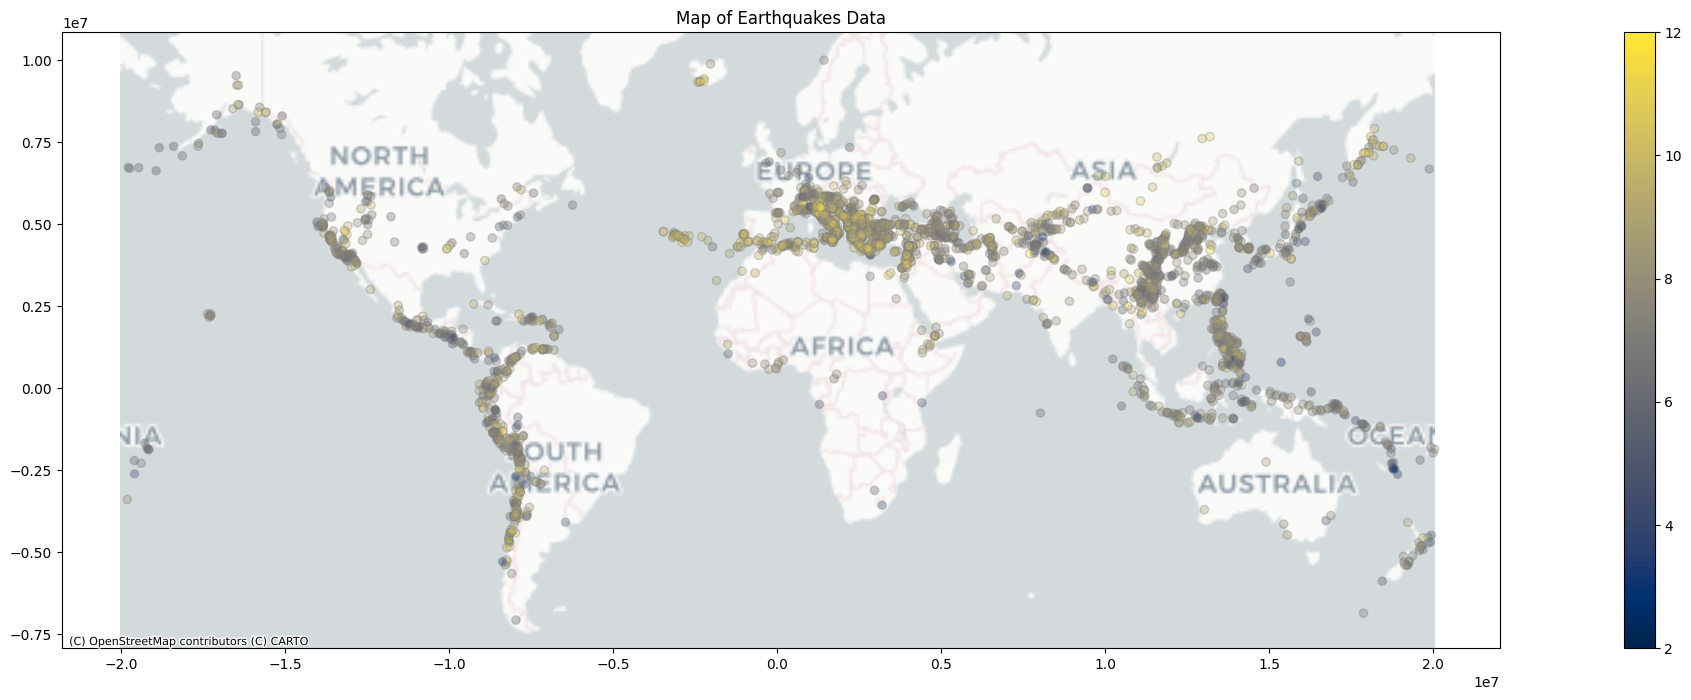

In [13]:
gdf_plot = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(32, 8))
gdf_plot.plot(
    column='Intensity',
    cmap='cividis',
    ax=ax, 
    alpha=0.35,
    legend=True,
    edgecolor='grey'
    )

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

ax.set_title("Map of Earthquakes Data")

plt.show()

### Interactive Data Visualization

In [14]:
gdf.explore(
    m = folium.Map(
        location=[0, 0], 
        tiles="OpenStreetMap", # "CartoDB Voyager", OpenStreetMap
        zoom_start=2,
        prefer_canvas=True
        ),
    popup=True,
    highlight=True,
    legend=True,
    control_scale=True,
    style_kwds = {
        'stroke': True,
        'color': '#3271a5',
        'weight': 0.50,
        'opacity': 0.75,
        'fill': True,
        'fillColor': '#b8e2f4',
        'fillOpacity': 0.20
    },
    highlight_kwds = {
        'stroke': True,
        'color': 'green',
        'weight': 5,
        'opacity': 1,
        'fill': True,
        'fillColor': '#88e788',
        'fillOpacity': 0.75
    },
    tooltip_kwds = {
        'labels': True
    }
)

## Methods & Attributes

### Append Geometry Type Feature to GeoDataFrame

In [16]:
print("Geometry Type")

gdf_gt = gdf.copy()
gdf_gt['geometry_type'] = gdf.geom_type

gdf_gt

Geometry Type


Tsunami Flag  Focal Depth  Primary Magnitude  MW Magnitude  MS Magnitude  \
0      No Tsunami          NaN                NaN           NaN           NaN   
1         Tsunami          NaN                NaN           NaN           NaN   
2         Tsunami          NaN                6.8           NaN           6.8   
3      No Tsunami          NaN                NaN           NaN           NaN   
4         Tsunami          NaN                7.0           NaN           7.0   
...           ...          ...                ...           ...           ...   
6203      Tsunami         35.0                6.8           NaN           6.8   
6204   No Tsunami          NaN                6.1           NaN           NaN   
6205   No Tsunami          NaN                6.5           NaN           6.5   
6206   No Tsunami         20.0                5.7           NaN           5.7   
6207      Tsunami         38.0                7.0           NaN           7.0   

      MB Magnitude  ML Magnitude  UK Magnitude  Intensity  Country  ...  \
0              NaN           NaN           NaN       10.0  Albania  ...   
1              NaN           NaN           NaN        9.0   Turkey  ...   
2              NaN           NaN           NaN        9.0  Albania  ...   
3              NaN           NaN           NaN       10.0   Greece  ...   
4              NaN           NaN           NaN        9.0   Turkey  ...   
...            ...           ...           ...        ...      ...  ...   
6203           NaN           NaN           NaN        NaN   Panama  ...   
6204           NaN           NaN           6.1        8.0   Turkey  ...   
6205           NaN           NaN           NaN        9.0    China  ...   
6206           NaN           NaN           NaN        NaN   Greece  ...   
6207           NaN           NaN           NaN        8.0   Russia  ...   

     Houses Damaged Total Deaths  Total Missing  Total Injuries  \
0        Not Listed          NaN            NaN             NaN   
1        Not Listed          NaN            NaN             NaN   
2        Not Listed          NaN            NaN             NaN   
3        Not Listed          NaN            NaN             NaN   
4        Not Listed          NaN            NaN             NaN   
...             ...          ...            ...             ...   
6203     Not Listed          NaN            NaN             NaN   
6204     Not Listed          NaN            NaN             NaN   
6205     Not Listed          NaN            NaN             NaN   
6206     Not Listed          1.0            NaN            23.0   
6207     Not Listed          NaN            NaN             NaN   

      Total Damage (in Millions of $)  Total Houses Destroyed  \
0                                -1.0                     NaN   
1                                -1.0                     NaN   
2                                -1.0                     NaN   
3                                -1.0                     NaN   
4                                -1.0                     NaN   
...                               ...                     ...   
6203                             -1.0                     NaN   
6204                             -1.0                     NaN   
6205                             -1.0                     NaN   
6206                             -1.0                     NaN   
6207                             -1.0                     NaN   

      Total Houses Damaged               geometry       date  geometry_type  
0                      NaN      POINT (19.3 41.2)        NaT          Point  
1                      NaN      POINT (26.5 40.3)        NaT          Point  
2                      NaN      POINT (19.4 41.4)        NaT          Point  
3                      NaN      POINT (25.5 35.5)        NaT          Point  
4                      NaN      POINT (27.6 40.9)        NaT          Point  
...                    ...                    ...        ...            ...  

### Add Distance Features to Dataset

In [17]:
# Use the Harvard address coordinates as the reference point for distances

latitude = 42.3745
longitude = -71.1185

# Create a Shapely Point object
ref_point = Point(longitude, latitude)

if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)

# Estimate an appropriate UTM CRS for your GeoDataFrame
utm_crs = gdf.estimate_utm_crs()

# Reproject your GeoDataFrame to the estimated UTM CRS
gdf_projected = gdf.to_crs(utm_crs)

# Reproject the reference point to the same UTM CRS
ref_point_projected = geopandas.GeoSeries([ref_point], crs='EPSG:4326').to_crs(utm_crs).iloc[0]

In [18]:
# Calculate distances
gdf_projected['dist_from_harvard'] = gdf_projected['geometry'].distance(ref_point_projected)
gdf_projected['frechet_dist_from_harvard'] = gdf_projected['geometry'].frechet_distance(ref_point_projected)
gdf_projected['hausdorff_dist_from_harvard'] = gdf_projected['geometry'].hausdorff_distance(ref_point_projected)

gdf_projected

Tsunami Flag  Focal Depth  Primary Magnitude  MW Magnitude  MS Magnitude  \
0      No Tsunami          NaN                NaN           NaN           NaN   
1         Tsunami          NaN                NaN           NaN           NaN   
2         Tsunami          NaN                6.8           NaN           6.8   
3      No Tsunami          NaN                NaN           NaN           NaN   
4         Tsunami          NaN                7.0           NaN           7.0   
...           ...          ...                ...           ...           ...   
6203      Tsunami         35.0                6.8           NaN           6.8   
6204   No Tsunami          NaN                6.1           NaN           NaN   
6205   No Tsunami          NaN                6.5           NaN           6.5   
6206   No Tsunami         20.0                5.7           NaN           5.7   
6207      Tsunami         38.0                7.0           NaN           7.0   

      MB Magnitude  ML Magnitude  UK Magnitude  Intensity  Country  ...  \
0              NaN           NaN           NaN       10.0  Albania  ...   
1              NaN           NaN           NaN        9.0   Turkey  ...   
2              NaN           NaN           NaN        9.0  Albania  ...   
3              NaN           NaN           NaN       10.0   Greece  ...   
4              NaN           NaN           NaN        9.0   Turkey  ...   
...            ...           ...           ...        ...      ...  ...   
6203           NaN           NaN           NaN        NaN   Panama  ...   
6204           NaN           NaN           6.1        8.0   Turkey  ...   
6205           NaN           NaN           NaN        9.0    China  ...   
6206           NaN           NaN           NaN        NaN   Greece  ...   
6207           NaN           NaN           NaN        8.0   Russia  ...   

     Total Missing Total Injuries  Total Damage (in Millions of $)  \
0              NaN            NaN                             -1.0   
1              NaN            NaN                             -1.0   
2              NaN            NaN                             -1.0   
3              NaN            NaN                             -1.0   
4              NaN            NaN                             -1.0   
...            ...            ...                              ...   
6203           NaN            NaN                             -1.0   
6204           NaN            NaN                             -1.0   
6205           NaN            NaN                             -1.0   
6206           NaN           23.0                             -1.0   
6207           NaN            NaN                             -1.0   

      Total Houses Destroyed  Total Houses Damaged  \
0                        NaN                   NaN   
1                        NaN                   NaN   
2                        NaN                   NaN   
3                        NaN                   NaN   
4                        NaN                   NaN   
...                      ...                   ...   
6203                     NaN                   NaN   
6204                     NaN                   NaN   
6205                     NaN                   NaN   
6206                     NaN                   NaN   
6207                     NaN                   NaN   

                              geometry       date  dist_from_harvard  \
0      POINT (1868976.345 4691111.531)        NaT       7.837781e+06   
1       POINT (2505144.51 4735414.554)        NaT       8.395629e+06   
2      POINT (1873067.018 4715044.566)        NaT       7.830956e+06   
3      POINT (2557057.018 4170360.055)        NaT       8.686384e+06   
4      POINT (2579598.592 4829994.048)        NaT       8.426135e+06   
...                                ...        ...                ...   
6203   POINT (-15421078.5 7200954.032) 1962-03-12       1.029498e+07   
6204   POINT (3632549.776 4858347.288) 1964-06-14       9.393584e

### Retrieve Coordinates

In [19]:
gdf_get_coords = gdf.get_coordinates(include_z=True)
gdf_count_coords = gdf.count_coordinates()
gdf_count_geos = gdf.count_geometries()

print(f"GDF Coordinates:\n{gdf_get_coords}\n")
print(f"GDF Count Coordinates:\n{gdf_count_coords}\n")
print(f"GDF Count Geometries:\n{gdf_count_geos}")

GDF Coordinates:
            x       y   z
0      19.300  41.200 NaN
1      26.500  40.300 NaN
2      19.400  41.400 NaN
3      25.500  35.500 NaN
4      27.600  40.900 NaN
...       ...     ...  ..
6203  -82.757   8.008 NaN
6204   38.300  38.100 NaN
6205  103.100  26.100 NaN
6206   21.200  39.200 NaN
6207  151.110  45.530 NaN

[6152 rows x 3 columns]

GDF Count Coordinates:
0       1
1       1
2       1
3       1
4       1
       ..
6203    1
6204    1
6205    1
6206    1
6207    1
Length: 6207, dtype: int32

GDF Count Geometries:
0       1
1       1
2       1
3       1
4       1
       ..
6203    1
6204    1
6205    1
6206    1
6207    1
Length: 6207, dtype: int32


### Some Basic Functions

In [29]:
gdf_is_simple = gdf.is_simple
gdf_is_valid = gdf.is_valid
gdf_is_valid_reason = gdf.is_valid_reason()
gdf_has_z = gdf.has_z

gdf_is_simple_value_counts = gdf_is_simple.value_counts()
gdf_is_valid_value_counts = gdf_is_valid.value_counts()
gdf_is_valid_reason_value_counts = gdf_is_valid_reason.value_counts()
gdf_has_z_value_counts = gdf_has_z.value_counts()

print(f"is_simple:\n{gdf_is_simple_value_counts}\n")
print(f"is_valid:\n{gdf_is_valid_value_counts}\n")
print(f"is_valid_reason:\n{gdf_is_valid_reason_value_counts}\n")
print(f"has_z:\n{gdf_has_z_value_counts}\n")

is_simple:
True     6152
False      55
dtype: int64

is_valid:
True     6152
False      55
dtype: int64

is_valid_reason:
Valid Geometry    6152
dtype: int64

has_z:
False    6207
dtype: int64



### Some More Functions

In [31]:
gdf_projected.buffer(distance=125)

0       POLYGON ((1869101.345 4691111.531, 1869100.743...
1       POLYGON ((2505269.51 4735414.554, 2505268.908 ...
2       POLYGON ((1873192.018 4715044.566, 1873191.416...
3       POLYGON ((2557182.018 4170360.055, 2557181.416...
4       POLYGON ((2579723.592 4829994.048, 2579722.99 ...
                              ...                        
6203    POLYGON ((-15420953.5 7200954.032, -15420954.1...
6204    POLYGON ((3632674.776 4858347.288, 3632674.174...
6205    POLYGON ((9374654.584 12172115.269, 9374653.98...
6206    POLYGON ((2076695.179 4500242.289, 2076694.577...
6207    POLYGON ((2981548.154 14434629.878, 2981547.55...
Length: 6207, dtype: geometry

In [32]:
gdf_projected.centroid

0        POINT (1868976.345 4691111.531)
1         POINT (2505144.51 4735414.554)
2        POINT (1873067.018 4715044.566)
3        POINT (2557057.018 4170360.055)
4        POINT (2579598.592 4829994.048)
                      ...               
6203     POINT (-15421078.5 7200954.032)
6204     POINT (3632549.776 4858347.288)
6205    POINT (9374529.584 12172115.269)
6206     POINT (2076570.179 4500242.289)
6207    POINT (2981423.154 14434629.878)
Length: 6207, dtype: geometry

In [33]:
gdf.force_2d()

0           POINT (19.3 41.2)
1           POINT (26.5 40.3)
2           POINT (19.4 41.4)
3           POINT (25.5 35.5)
4           POINT (27.6 40.9)
                ...          
6203    POINT (-82.757 8.008)
6204        POINT (38.3 38.1)
6205       POINT (103.1 26.1)
6206        POINT (21.2 39.2)
6207     POINT (151.11 45.53)
Length: 6207, dtype: geometry

In [35]:
gdf.active_geometry_name

'geometry'

### Aggregating & Exploding

In [36]:
gdf.dissolve(by="Tsunami Flag")

geometry  Focal Depth  \
Tsunami Flag                                                                   
No Tsunami    MULTIPOINT (-179.513 -21.696, -179 -18, -179 -...         30.0   
Tsunami       MULTIPOINT (-179.984 -16.76, -179.971 51.307, ...         30.0   

              Primary Magnitude  MW Magnitude  MS Magnitude  MB Magnitude  \
Tsunami Flag                                                                
No Tsunami                  7.5           7.5           7.5           5.4   
Tsunami                     6.8           8.0           6.8           7.8   

              ML Magnitude  UK Magnitude  Intensity  Country  ...  \
Tsunami Flag                                                  ...   
No Tsunami             5.9           7.7       10.0  Albania  ...   
Tsunami                6.2           8.3        9.0   Turkey  ...   

             Damage (in Millions of $) Houses Destroyed  Houses Damaged  \
Tsunami Flag                                                              
No Tsunami                       0.900          21829.0      Not Listed   
Tsunami                          0.025          11750.0      Not Listed   

              Total Deaths  Total Missing  Total Injuries  \
Tsunami Flag                                                
No Tsunami          3466.0            1.0            10.0   
Tsunami             1443.0            9.0            25.0   

              Total Damage (in Millions of $)  Total Houses Destroyed  \
Tsunami Flag                                                            
No Tsunami                               -1.0                 21829.0   
Tsunami                                  -1.0                 11750.0   

             Total Houses Damaged       date  
Tsunami Flag                                  
No Tsunami                 2271.0 1679-12-16  
Tsunami                     455.0 1678-06-18  

[2 rows x 26 columns]

In [37]:
gdf.dissolve(by="Country")

geometry  \
Country                                                                                   
Afghanistan                           MULTIPOINT (61.852 34.89, 62.1 35, 66 36, 66.2...   
Albania                               MULTIPOINT (19.3 40.3, 19.3 41.2, 19.4 40.1, 1...   
Algeria                               MULTIPOINT (-6 30, -1.281 35.321, -0.658 35.88...   
Antarctica                            MULTIPOINT (-46.401 -60.274, -43.411 -60.532, ...   
Antigua And Barbuda                       MULTIPOINT (-62.4 17.2, -62 17.3, -61.5 17.5)   
...                                                                                 ...   
Venezuela                             MULTIPOINT (-73 7.6, -72.3 7.3, -72.1 7.5, -71...   
Vietnam                               MULTIPOINT (103.282 21.721, 104.541 20.872, 10...   
Wallis And Futuna (French Territory)                           POINT (-178.252 -14.385)   
Yemen                                 MULTIPOINT (43.2 14.1, 43.3 13.3, 43.3 14.2, 4...   
Zambia                                                 MULTIPOINT (30.031 -8.44, 31 -8)   

                                     Tsunami Flag  Focal Depth  \
Country                                                          
Afghanistan                            No Tsunami        236.0   
Albania                                No Tsunami         10.0   
Algeria                                No Tsunami         13.0   
Antarctica                                Tsunami         10.0   
Antigua And Barbuda                       Tsunami         47.0   
...                                           ...          ...   
Venezuela                                 Tsunami         20.0   
Vietnam                                   Tsunami         17.0   
Wallis And Futuna (French Territory)   No Tsunami         10.0   
Yemen                                  No Tsunami          5.0   
Zambia                                 No Tsunami         30.0   

                                      Primary Magnitude  MW Magnitude  \
Country                                                                 
Afghanistan                                         6.4           6.4   
Albania                                             6.8           5.2   
Algeria                                             5.0           5.9   
Antarctica                                          8.1           8.1   
Antigua And Barbuda                                 8.0           NaN   
...                                                 ...           ...   
Venezuela                                           7.0           7.0   
Vietnam                                             6.1           6.3   
Wallis And Futuna (French Territory)                6.4           6.4   
Yemen                                               5.9           NaN   
Zambia                                              7.3           5.9   

                                      MS Magnitude  MB Magnitude  \
Country                                                            
Afghanistan                                    5.7           5.8   
Albania                                        6.8           4.5   
Algeria                                        5.0           5.4   
Antarctica                                     8.0           6.6   
Antigua And Barbuda                            8.0           6.6   
...                                            ...           ...   
Venezuela                                      6.8           6.2   
Vietnam                                        6.6           4.5   
Wallis And Futuna (French Territory)           6.4           6.0   
Yemen                                          5.9           6.5   
Zambia                                         7.3           NaN   

                                      ML Magnitude  UK Magnitude  Intensity  \
Country                                                                       
Afghanistan                                

In [38]:
gdf.dissolve(by="State")

geometry Tsunami Flag  \
State                                                                        
AK          MULTIPOINT (-179.971 51.307, -178.55 50.73, -1...      Tsunami   
AL                                     POINT (-85.629 34.494)   No Tsunami   
AR                                         POINT (-90.4 35.6)      Tsunami   
BC          MULTIPOINT (-132.2 52.63, -131.9 52.2, -131 51...      Tsunami   
CA          MULTIPOINT (-125.97 41.301, -125.68 40.402, -1...      Tsunami   
CO              MULTIPOINT (-107.497 38.947, -104.701 37.063)   No Tsunami   
CT                                       POINT (-72.92 41.31)      Tsunami   
GU          MULTIPOINT (141.476 12.484, 143.3 14, 144.619 ...   No Tsunami   
HI          MULTIPOINT (-157 20.7, -156 19.7, -155.935 19....      Tsunami   
ID                MULTIPOINT (-113.916 43.974, -112.55 42.06)   No Tsunami   
IL                                     POINT (-87.886 38.452)   No Tsunami   
KY                  MULTIPOINT (-88.98 36.87, -83.907 38.174)   No Tsunami   
MA                      MULTIPOINT (-71.05 42.35, -70.3 42.7)      Tsunami   
MO              MULTIPOINT (-89.6 36.3, -89.6 36.5, -89.4 37)      Tsunami   
MP          MULTIPOINT (145.507 18.543, 145.682 16.591, 14...      Tsunami   
MT          MULTIPOINT (-112.615 45.365, -112.13 45.394, -...   No Tsunami   
NC                                     POINT (-81.094 36.476)   No Tsunami   
NH                                        POINT (-71.53 43.2)   No Tsunami   
NV          MULTIPOINT (-119.93 39.52, -118.5 39.4, -118.5...   No Tsunami   
NY          MULTIPOINT (-79 42.7, -78.3 42.9, -74.883 40.6...      Tsunami   
Not Listed  MULTIPOINT (-179.984 -16.76, -179.513 -21.696,...   No Tsunami   
OK          MULTIPOINT (-97.271 35.937, -97.146 35.524, -9...   No Tsunami   
OR                      MULTIPOINT (-125 45, -122.012 42.314)   No Tsunami   
PA          MULTIPOINT (-76.037 40.33, -75.2 39.8, -75.1 3...   No Tsunami   
PR          MULTIPOINT (-70 18.5, -68.833 18.986, -68.2 18...   No Tsunami   
SC                                           POINT (-80 32.9)      Tsunami   
TAS         MULTIPOINT (157.5 -56, 157.8 -59.1, 158.513 -5...      Tsunami   
TX                                     POINT (-97.088 31.817)   No Tsunami   
UT          MULTIPOINT (-113.5 37.4, -112.8 41.7, -112.7 4...   No Tsunami   
VA                                     POINT (-77.933 37.936)   No Tsunami   
VI          MULTIPOINT (-65.1 18.1, -64.9 18.35, -64.5 18....      Tsunami   
WA          MULTIPOINT (-123.5 48, -122.727 47.149, -122.6...   No Tsunami   
WY               MULTIPOINT (-110.976 42.762, -105.72 42.375)   No Tsunami   

            Focal Depth  Primary Magnitude  MW Magnitude  MS Magnitude  \
State                                                                    
AK                 15.0                8.6           8.6           7.3   
AL                 20.0                4.6           4.6           NaN   
AR                  NaN                7.5           7.5           8.5   
BC                 33.0                7.0           7.0           5.8   
CA                  8.0                6.5           7.2           6.5   
CO                  4.0                5.4           5.4           NaN   
CT                  NaN                NaN           NaN           NaN   
GU                113.0                6.1           7.1           8.1   
HI                 12.0                7.9           6.9           6.7   
ID                 14.0                7.3           NaN           7.3   
IL                 14.0                5.3           5.3           4.8   
KY                  8.0                5.1           4.0           5.1   
MA                  NaN                7.0           NaN           NaN   
MO                  NaN                7.5           7.5           8.8   
MP                 10.0                4.4           7.7           7.5   
MT                 14.0                4.5           4.5        

In [39]:
gdf.dissolve(by="Houses Damaged")

geometry  \
Houses Damaged                                                      
1               MULTIPOINT (28.927 38.019, 79.255 30.476, 81.3...   
10              MULTIPOINT (-86.06 13.452, 11.45 44.329, 27.48...   
100             MULTIPOINT (-119.9 34.2, -69.948 10.045, -64.9...   
1000            MULTIPOINT (-97.653 16.646, 43.5 16.4, 61.996 ...   
10000                                      POINT (124.557 45.279)   
...                                                           ...   
959000                                     POINT (100.276 27.291)   
976                                         POINT (29.697 37.948)   
9821                                           POINT (135.1 35.6)   
994                                          POINT (96.085 2.824)   
Not Listed      MULTIPOINT (-179.984 -16.76, -179.971 51.307, ...   

               Tsunami Flag  Focal Depth  Primary Magnitude  MW Magnitude  \
Houses Damaged                                                              
1                No Tsunami         26.0                5.3           5.4   
10               No Tsunami         34.0                4.4           5.3   
100              No Tsunami         10.0                5.2           5.2   
1000             No Tsunami         36.0                6.2           7.2   
10000            No Tsunami         10.0                5.1           5.1   
...                     ...          ...                ...           ...   
959000           No Tsunami         11.0                6.6           6.6   
976              No Tsunami         10.0                5.8           5.8   
9821                Tsunami         10.0                7.3           NaN   
994              No Tsunami         30.0                7.3           7.3   
Not Listed       No Tsunami         30.0                6.8           8.0   

                MS Magnitude  MB Magnitude  ML Magnitude  UK Magnitude  \
Houses Damaged                                                           
1                        5.2           5.3           NaN           NaN   
10                       5.2           4.4           4.9           NaN   
100                      5.2           4.1           7.1           7.7   
1000                     6.2           6.3           NaN           6.5   
10000                    NaN           NaN           NaN           NaN   
...                      ...           ...           ...           ...   
959000                   6.5           6.4           NaN           NaN   
976                      NaN           NaN           NaN           NaN   
9821                     7.3           NaN           NaN           NaN   
994                      7.6           6.2           NaN           NaN   
Not Listed               6.8           7.8           6.2           7.7   

                Intensity  ... Injuries Damage (in Millions of $)  \
Houses Damaged             ...                                      
1                     NaN  ...     10.0                       NaN   
10                    7.0  ...      2.0                       NaN   
100                   5.0  ...      4.0                       NaN   
1000                  8.0  ...    200.0                       1.5   
10000                 NaN  ...      NaN                       NaN   
...                   ...  ...      ...                       ...   
959000                9.0  ...  17057.0                     506.0   
976                   NaN  ...      NaN                       NaN   
9821                  NaN  ...   3295.0                      40.0   
994                   NaN  ...     65.0                       NaN   
Not Listed           10.0  ...     25.0                       0.9   

               Houses Destroyed  Total Deaths  Total Missing  Total Injuries  \
Houses Damaged                                                                 
1                           1.0           1.0            NaN            10.0   
10                         10.0           1.0           

### Interface

In [ ]:
gdf.__geo_interface__

# I cleared the results (even they printed perfectly) to reduce the file size so that I could more easily upload this file to GitHub.

In [ ]:
for feature in gdf.iterfeatures():
    print(feature)

# I cleared the results (even they printed perfectly) to reduce the file size so that I could more easily upload this file to GitHub.

## Save Cleaned Dataset to File

In [42]:
new_file_name_and_path = 'data/cleaned_gdf_file.geojson'

gdf.to_file(new_file_name_and_path, driver="geojson")

### Resources Used (links to libraries used in this project)

- GeoPandas: https://geopandas.org/en/stable/